In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from zipfile import ZipFile
import os

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn import datasets, metrics, model_selection, svm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_size = os.path.getsize('/content/train.csv.gz')
print("File Size is :", file_size, "bytes"

In [ ]:
#read from URL
import requests, zipfile, io

url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
filename = 'thads2013n.txt'

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

import pandas as pd
df = pd.read_csv(filename, sep=',')
df 

In [3]:
df = pd.read_csv('/content/drive/MyDrive/train.csv.gz')

In [4]:
#How data looks
df.head(10)

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,0.147295,0.026177,0.106613,0.200924,0.713191,0.155750,0.557335,0.341702,0.285720,0.230396,0.203957,0.509588,0.706972,1,0.007793,0.247765,0.263750,0.259555,0.231730,0.138379,0.197824,0.054392,0.194153,0.281500,0.034818,0.025334,0.114432,0.139203,0.246157,0.251371,...,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,0.238509,0.493411,0.107277,0.231828,0.457150,0.395200,0.617088,0.459358,0.209225,0.201098,0.199383,0.366578,0.585788,1,0.285311,0.400367,0.162493,0.249365,0.141160,0.133688,0.247906,0.139251,0.216444,0.109674,0.033018,0.017458,0.189336,0.168785,0.184251,0.202753,...,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1
2,2,0.182583,0.307431,0.325950,0.207116,0.605699,0.309695,0.493337,0.751107,0.536272,0.286813,0.139532,0.107222,0.247791,0.631949,0.347463,0.642173,0.257763,0.162548,0.327377,0.193583,0.495440,0.636742,0,0.007133,0.309747,0.221081,0.284810,0.230828,0.138271,0.199742,0.060408,0.146746,0.208131,0.035977,0.022631,0.113542,0.274871,0.182770,0.151502,...,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1
3,3,0.180240,0.494592,0.008367,0.223580,0.760618,0.439211,0.432055,0.776147,0.483958,0.260886,0.147122,0.105433,0.287755,0.455777,0.247971,0.616628,0.335907,0.337025,0.239127,0.176163,0.538269,0.706468,1,0.008829,0.353799,0.219977,0.266858,0.145617,0.138590,0.234925,0.059817,0.140886,0.205023,0.319312,0.009972,0.112291,0.288915,0.332632,0.140831,...,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,4,0.177172,0.495513,0.014263,0.548819,0.625396,0.562493,0.117158,0.561255,0.077115,0.158321,0.260239,0.102561,0.265285,0.503776,0.269776,0.545945,0.319548,0.278538,0.214922,0.200239,0.534551,0.728652,0,0.004840,0.323546,0.166292,0.285516,0.208651,0.200394,0.198155,0.414729,0.251997,0.193405,0.034490,0.016465,0.197312,0.207429,0.255857,0.139875,...,0,0,0,1,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1
5,5,0.255237,0.345842,0.021549,0.220755,0.524854,0.423693,0.533150,0.628484,0.340781,0.146893,0.152730,0.105788,0.187001,0.529869,0.177117,0.602677,0.345858,0.324575,0.244007,0.224110,0.477728,0.777664,1,0.002776,0.257023,0.346681,0.230550,0.144390,0.140246,0.372983,0.210188,0.154155,0.262118,0.042412,0.008767,0.212664,0.142091,0.189681,0.191045,...,0,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
6,6,0.203610,0.434725,0.180539,0.238135,0.647089,0.633265,0.580177,0.758934,0.571226,0.579412,0.426622,0.104884,0.238304,0.628129,0.314246,0.486580,0.270498,0.665970,0.237637,0.211892,0.454681,0.753245,0,0.007516,0.258453,0.173357,0.258534,0.239779,0.290016,0.197300,0.057111,0.282085,0.169830,0.046507,0.024767,0.111747,0.210729,0.209142,0.154892,...,1,1,0,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,7,0.184985,0.489515,0.094419,0.304358,0.721958,0.306020,0.386065,0.651795,0.324744,0.448921,0.030085,0.105489,0.217417,0.657741,0.247460,0.632218,0.312692,0.281363,0.214815,0.206068,0.467943,0.753306,0,0.004798,0.423097,0.179659,0.261882,0.157969,0.267270,0.264181,0.101828,0.139149,0.162180,0.042454,0.019862,0.142733,0.164411,0.241503,0.187377,...,1,0,0,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1
8,8,0.165046,0.656603,0.017722,0.210186,0.468217,0.451836,0.434683,0.631538,0.608107,0.150568,0.145987,0.227982,0.317801,0.583250,0.225179,0.538048,0.392855,0.258227,0.209927,0.218304,0.46

In [5]:
#Check for missing data
missing = df.columns[df.isnull().any()]
print(missing)

Index([], dtype='object')


No data missing, GREAT!
Let's remove id column

In [4]:
df = df.iloc[:, 1:]

In [7]:
#Let's have a look on data statistics
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000
mean,0.214334,0.460218,0.129253,0.277598,0.580710,0.416619,0.386532,0.654858,0.462256,0.258031,0.181128,0.131991,0.278548,0.595653,0.292308,0.593562,0.336334,0.243227,0.225491,0.221857,0.481103,0.700318,0.548061,0.063248,0.284030,0.234265,0.260321,0.196285,0.181265,0.228721,0.118508,0.236993,0.226346,0.080244,0.052288,0.131734,0.205375,0.218599,0.257150,0.485651,...,0.804147,0.679138,0.279384,0.408040,0.434857,0.491085,0.281427,0.830737,0.342218,0.590451,0.278183,0.187018,0.539352,0.390343,0.266291,0.347034,0.173990,0.442588,0.495109,0.407147,0.262252,0.393640,0.302201,0.203648,0.469065,0.426087,0.256545,0.310854,0.345492,0.244899,0.250096,0.137164,0.144793,0.130667,0.139210,0.199331,0.156065,0.183741,0.15468,0.500485
std,0.053320,0.101316,0.120805,0.063163,0.115338,0.058231,0.133457,0.065158,0.129439,0.119081,0.157788,0.077778,0.071025,0.075483,0.090123,0.086750,0.085286,0.068466,0.044640,0.044283,0.050815,0.075411,0.497685,0.118831,0.094791,0.073762,0.047038,0.081383,0.074089,0.049318,0.099597,0.080056,0.106163,0.109916,0.111535,0.057181,0.081033,0.057003,0.095631,0.107811,...,0.396856,0.466808,0.448697,0.491471,0.495738,0.499921,0.449696,0.374984,0.474452,0.491751,0.448104,0.389926,0.498449,0.487827,0.442018,0.476027,0.379101,0.496693,0.499976,0.491303,0.439859,0.488557,0.459212,0.402710,0.499042,0.494507,0.436726,0.462843,0.475529,0.430028,0.433068,0.344021,0.351892,0.337036,0.346166,0.399498,0.362917,0.387273,0.36160,0.500000
min,0.041790,0.022016,0.000381,0.000000,0.000000,0.000959,0.000592,0.017994,0.000990,0.051183,0.000000,0.000000,0.037846,0.024079,0.003086,0.011323,0.000000,0.000818,0.014163,0.010135,0.081429,0.067804,0.000000,0.000182,0.016970,0.023514,0.047751,0.013686,0.009447,0.030857,0.000000,0.057145,0.019329,0.001174,0.000216,0.000000,0.068346,0.031468,0.033686,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.181676,0.389215,0.017692,0.235342,0.497938,0.374390,0.317815,0.615372,0.363753,0.164559,0.027519,0.103078,0.236119,0.565547,0.239312,0.544008,0.304199,0.204140,0.200744,0.197627,0.450656,0.660346,0.000000,0.006746,0.221265,0.184328,0.231221,0.141

In [8]:
df.shape

(1000000, 286)

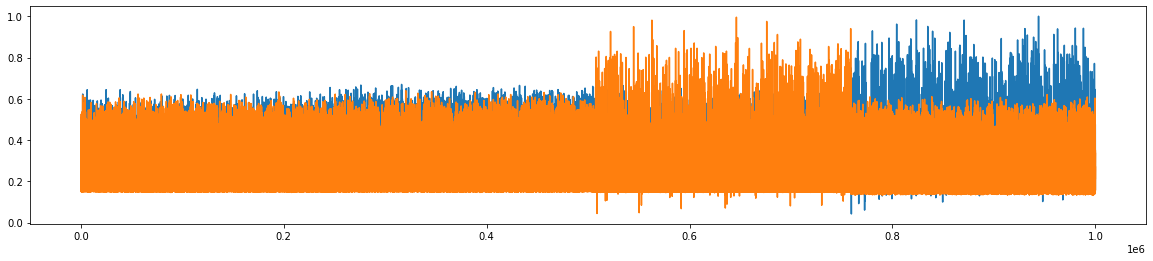

In [9]:
df['f0'].plot(figsize=(20,4))
df['f100'].plot(figsize=(20,4))

In [5]:
#Let's separate features and labels
x = df.iloc[:, :-1 ]
y = df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
#Global maximum including label
df.to_numpy().max()

1.0

In [12]:
#Global minimum including label
df.to_numpy().min()

0.0

In [21]:
#Dimensionality reduction
#lda = LDA(n_components=10)
#X_train = lda.fit_transform(x, y)

#let's try this as above crashes the system

pca = PCA(n_components=95)
x_pca = pca.fit_transform(x)

In [22]:
#Check how much variance is covered with each component. Four equals close to ??%
#lda.explained_variance_ratio_
pca.explained_variance_ratio_.sum()

0.8998862508251505

In [25]:
x_train = pd.DataFrame(x_pca)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,0.160957,0.959152,-0.116127,0.201139,-0.437638,0.368458,-0.159623,0.005697,1.147421,-0.268734,-0.220464,-0.328470,-0.284162,-0.441233,-0.106984,0.283774,0.782272,-0.324241,0.416554,0.951266,0.413587,0.677210,-0.253914,0.070239,0.728625,0.764545,-0.451668,-0.302003,-0.228036,-0.182692,-0.217429,-0.204474,0.792253,-0.152231,-0.349656,-0.282079,-0.167924,-0.172850,-0.179505,-0.141691,...,-0.177072,-0.105303,-0.063418,-0.037908,-0.077146,0.269461,0.312913,0.278893,0.257050,0.393430,0.150682,-0.002388,0.221096,-0.057544,0.166800,0.257018,-0.133491,-0.103811,-0.019603,0.010633,-0.214923,0.365529,0.319051,0.006106,-0.132575,-0.042446,-0.024941,-0.105598,-0.089558,0.057940,0.064827,-0.109171,-0.037627,-0.069415,0.095608,0.024563,-0.087575,0.046726,0.012808,-0.068461
1,-0.729587,-0.098848,-0.478644,-0.614137,0.051506,0.119358,-0.773984,0.171063,0.722957,-0.262247,0.775194,0.110135,0.637299,-0.180457,0.984596,-0.289868,0.683439,0.399629,0.236722,0.699633,-0.212551,-0.469039,-0.044948,-0.552083,-0.050377,-0.173497,0.797914,-0.336676,-0.184736,0.720921,-0.248763,-0.218540,-0.253829,-0.284945,-0.143037,0.546932,-0.241231,-0.102324,-0.125082,-0.177714,...,0.244334,-0.082554,-0.138282,-0.062852,-0.079136,0.125530,0.371453,-0.133166,-0.069382,0.386973,0.027071,-0.046354,-0.275086,0.223387,0.133556,0.289109,0.038130,-0.096924,-0.027325,0.036427,-0.102245,0.163225,-0.146813,-0.115203,0.147331,-0.018395,0.169065,-0.164750,-0.004961,-0.033087,-0.257520,0.199295,0.370865,-0.211631,-0.227016,0.020969,-0.059557,-0.088834,-0.118462,-0.135794
2,0.312000,-0.090945,1.029720,-0.057483,0.619867,-0.153800,0.962201,0.242125,0.341019,0.688723,0.227183,-0.514337,-0.031491,0.344422,0.077227,0.773796,-0.132142,-0.713188,-0.185679,-0.463985,-0.286168,-0.360715,-0.119540,-0.502803,-0.054660,-0.263363,-0.234856,-0.304748,-0.146562,-0.229993,-0.217376,-0.158022,-0.189092,-0.192965,-0.169923,-0.251918,-0.149198,-0.132267,-0.149774,0.845057,...,-0.013649,0.307150,0.429049,-0.038282,0.365990,-0.180329,0.072040,-0.083091,0.044232,0.105384,-0.130663,-0.086964,0.268835,0.009744,-0.076441,0.068327,-0.116662,-0.063665,-0.049664,-0.041393,0.153404,-0.117282,0.181367,-0.079130,0.015369,-0.089898,0.103336,-0.163496,-0.164096,0.006630,0.060477,-0.087780,-0.081411,0.058559,-0.029983,-0.090236,-0.087288,0.061896,-0.047407,-0.076420
3,0.095984,0.288108,0.056859,0.256419,-1.034791,0.195634,0.876262,0.098320,-0.391479,-0.925782,0.266525,-0.137179,0.530801,-0.059019,-0.642635,-0.147468,0.115545,0.102585,0.760385,-0.164717,-0.177746,-0.386143,0.814832,-0.002400,-0.098644,-0.254277,0.751107,-0.343713,-0.230582,0.702905,-0.272683,-0.217565,-0.240755,-0.260026,-0.166431,0.385237,-0.217884,-0.108969,-0.130982,-0.195231,...,-0.264408,0.335565,-0.025622,-0.053151,-0.098638,-0.054227,-0.039950,-0.105998,0.182123,0.242242,-0.048238,-0.107546,-0.063453,-0.066470,-0.089860,0.021547,0.048859,-0.069742,-0.074189,0.005326,0.229370,-0.035361,0.053579,0.061974,0.071860,-0.049801,0.149981,0.133331,0.041240,0.069903,-0.114428,-0.380317,0.180426,0.054690,-0.029178,-0.069659,0.011591,-0.038198,-0.035918,0.186525
4,0.014661,-0.746702,0.653678,0.316438,0.593137,0.241288,0.863860,0.077948,0.057297,0.002555,0.166352,0.935471,-0.496563,0.553347,0.116322,0.843410,-0.168762,-0.652095,-0.419499,0.538956,-0.323622,-0.444562,-0.122422,-0.530010,-0.046716,-0.280280,-0.247756,-0.319042,-0.166784,-0.238725,-0.222457,-0.161527,-0.106769,-0.092862,0.795288,-0.469934,-0.072901,0.802775,-0.182106,-0.173848,...,-0.262159,-0.085337,-0.297091,-0.050983,-0.094047,-0.165553,0.085918,-0.086442,0.175256,0.155481,-0.109130,-0.096418,-0.108816,-0.027601,-0.111451,0.043422,0.057560,-0.025554,-0.058950,-0.087858,0.129241,-0.158150,0.020325,0.056103,-0.029278,-0.060516,-0.167802,0.147836,0.171335,0

In [ ]:
#Pick few features to see distribution
test = x.iloc[:,0:4] 
test['target'] = y.values
sns.pairplot(test, hue='target')

In [ ]:
#Sum of target to check label balance
total = test['target'].sum()
r, c = test.shape
rate = total/r
print(rate)

In [26]:
clf = MLPClassifier(random_state=1, max_iter=100).fit(x_train, y)

In [27]:
df = pd.read_csv('/content/drive/MyDrive/test.csv.gz')

In [47]:
#Let's separate features and labels
xt = df.iloc[:, :-1 ]
yt = np.array(df.iloc[:,-1])
yt

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
pca = PCA(n_components=95)
x_pca = pca.fit_transform(xt)
x_test = pd.DataFrame(x_pca)
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,-249999.5,0.126068,-0.147965,0.721599,0.203350,1.174656,0.363693,0.446617,0.299917,0.441038,0.695392,-0.034510,0.385437,0.288044,-0.713955,0.518734,0.493390,-0.333244,-0.453522,-0.575451,-0.110221,-0.374233,0.394591,0.167171,-0.797403,-0.100189,-0.285198,-0.081705,0.440988,0.324698,0.765845,0.689986,-0.331092,0.687316,-0.003613,-0.013240,0.861079,-0.143926,0.598344,-0.174219,...,0.328919,-0.127172,-0.072487,-0.154589,-0.070378,0.283622,-0.376208,0.212702,-0.215068,-0.158757,-0.160252,-0.004836,0.468295,-0.058419,-0.082101,-0.045996,0.119596,-0.148725,-0.073584,0.178518,-0.078137,-0.065072,0.219427,-0.046847,-0.019982,-0.125382,-0.066351,-0.224382,-0.143060,-0.047612,-0.139098,-0.035084,-0.021789,-0.149803,-0.015558,-0.190557,-0.026623,0.015167,-0.201267,0.360318
1,-249998.5,-0.028903,0.618748,0.411938,-0.585538,-0.526053,0.680424,0.335040,-0.442219,0.863549,0.813496,-0.203047,-0.164980,-0.114126,0.749829,-0.246355,-0.206391,-0.128316,-0.332559,0.038253,0.814395,-0.228283,-0.258063,-0.320192,0.015736,0.728273,-0.349451,-0.178506,0.465752,-0.021142,-0.643098,-0.264218,-0.175325,-0.141293,-0.253162,-0.201594,-0.174734,-0.212087,-0.225263,-0.184053,...,-0.083213,-0.083533,-0.074997,-0.122622,-0.067510,-0.089906,-0.014924,-0.141919,-0.136601,-0.129454,0.114207,-0.075397,0.249468,-0.185274,0.059243,-0.029088,0.161168,-0.078893,-0.188288,-0.066048,0.226782,0.178601,0.091121,0.170081,0.139170,-0.017842,0.355037,-0.091773,0.046773,-0.147808,-0.140800,-0.025110,0.074417,-0.091255,-0.086996,0.019076,-0.021917,0.147902,0.025483,0.017012
2,-249997.5,0.194521,-0.341290,-0.646520,0.651246,1.035466,-0.420797,0.340370,-0.283786,-0.263057,-0.014887,0.830752,0.312911,0.457366,0.396946,-0.382112,-0.266513,-0.236187,-0.233667,0.674322,-0.337569,-0.407818,-0.282266,-0.280267,0.036030,0.713977,0.241191,0.628578,0.566490,-0.080717,-0.665645,-0.078167,0.811737,-0.111940,-0.232607,0.011973,0.881305,-0.171250,0.691999,-0.215328,...,0.553574,-0.103377,-0.091528,0.407012,-0.091456,-0.135547,-0.017939,-0.170070,-0.167779,-0.129320,-0.114796,-0.025689,-0.147537,0.064823,-0.082218,-0.010143,-0.036520,-0.062865,-0.005032,0.040682,0.012040,-0.089367,-0.103367,0.213294,-0.058298,0.122692,-0.062132,-0.088351,-0.006582,0.099503,-0.116279,-0.083131,-0.034833,0.116315,-0.007116,0.027791,0.027034,0.084201,0.081638,-0.003923
3,-249996.5,-0.558998,0.227277,-0.132554,0.347604,0.700984,-0.424277,-0.142577,-0.325522,0.953662,-0.726744,-0.296974,-0.222391,-0.342271,0.844951,-0.149004,0.618205,-0.326917,-0.529231,-0.389196,-0.154322,-0.297141,-0.301148,-0.343502,-0.052467,0.719610,0.149024,0.709295,0.048302,-0.506412,0.025611,-0.136032,-0.203262,0.838610,-0.023346,1.004049,0.705682,-0.130653,0.655592,-0.156105,...,-0.096455,-0.094926,-0.073662,-0.161389,-0.075369,-0.078826,-0.019829,-0.140463,0.286978,0.257964,0.274321,-0.086428,0.202525,0.011862,0.232863,-0.224862,-0.099721,-0.138720,-0.086346,0.057759,-0.086510,-0.010115,0.025559,0.070603,0.198691,0.272229,-0.000157,0.115769,-0.057875,-0.225074,-0.103793,0.105864,-0.089594,-0.095624,-0.242946,0.091307,0.081965,0.132977,-0.160252,-0.117368
4,-249995.5,-0.100534,0.260965,-0.727523,-0.154685,-0.709397,-0.193719,0.430265,-0.919976,-0.270934,0.614050,-0.167983,-0.054099,-0.182881,0.668069,0.841051,-0.393846,-0.082735,-0.318719,0.611759,-0.557059,0.592741,-0.471399,0.621792,0.171003,-0.323824,-0.261010,-0.156017,-0.119021,-0.333414,0.045536,0.056370,0.758828,0.813658,-0.036552,-0.180820,-0.142417,-0.167210,0.503100,-0.146181,...,-0.095635,-0.082475,-0.080891,-0.203293,-0.087393,-0.114505,-0.031783,-0.143375,-0.021389,-0.118941,0.210412,0.244433,-0.162305,0.040719,-0.121490,-0.003204,-0.029063,-0.063998,0.085591,-0.104320,-0.176984,0.089061,0.022989,-0.049272,0.108743,-0.205511,0.014216,0.382405

In [46]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
clf.score(x_test,yt,sample_weight=None)

0.50538

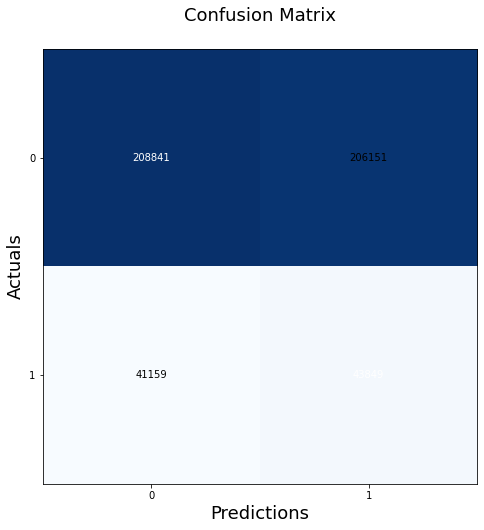

In [49]:
#from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(y_true=yt, y_pred=y_pred)

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(8, 8), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

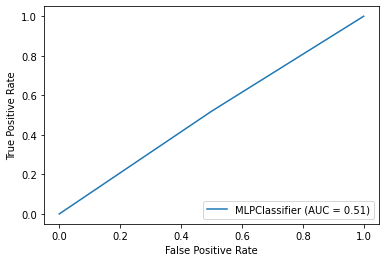

In [53]:
metrics.plot_roc_curve(clf, x_test, yt)